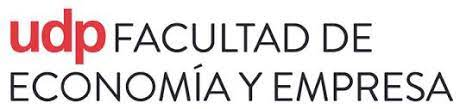



# UDP - Bussines Analytics 1
# Solemne 01


### Contenido de la clase:

### Exploratory Data Analysis de Prueba 01

### Contenido de la clase
* Aspectos Generales
* Preparación de la data

## Hacia donde vamos...
* Analítica Descriptiva:
  * Preprocessing
  * Exploratory Data Analysis
    * Análisis Univariado: distribución normal?
    * Test de comparación de médias: t-test, Chi2, KS, etc

### Instalación de la librería de estadísticas

In [163]:
# Para instalarla debes sacar el signo #
# ! pip install scipy

In [164]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# complementa algunas visualizaciones
%matplotlib inline
# apply some cool styling
sns.set(color_codes=True)

# Instalación de librería estadística
from scipy import stats
from scipy.stats import norm


# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


### Importamos la data desde nuestro Drive

1. from google.colab import drive
2. drive.mount("/content/drive")
3. Permitir acceso a nuestro Google Colab
4. link archivo


In [165]:
# from google.colab import drive
# drive.mount("/content/drive")
# df = pd.read_csv("/content/drive/MyDrive/UDP_BA01/data_store.csv",sep=",",encoding="latin-1")

# # To display the top 5 rows
# df.head(5)

In [166]:
# Cargar datos desde un repositorio de github


# Cargar datos desde un repositorio de github
# url = "https://raw.githubusercontent.com/Franciscoletelier/UDP_BA/master/data_store.csv"
# df = pd.read_csv(url,sep=",",encoding="latin-1")

# Ayuda para corregir este error
# URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>
# Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...






In [167]:
# Data Local
df = pd.read_csv("/Users/franciscoletelier/Dropbox (Personal)/UDP/UDP_BA/data_store.csv",sep=",",encoding="latin-1")
df.sample(10)



# Data desde Github
# df = pd.read_csv("data_store.csv",sep=",",encoding="latin-1")
# df.sample(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
183,184,CA-2014-158274,11/19/2014,11/24/2014,Second Class,RM-19675,Robert Marley,Home Office,United States,Monroe,...,71203,South,TEC-PH-10004896,Technology,Phones,Nokia Lumia 521 (T-Mobile),149.950,5,0.0,41.9860
6570,6571,CA-2014-100678,4/18/2014,4/22/2014,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Houston,...,77095,Central,OFF-EN-10000056,Office Supplies,Envelopes,Cameo Buff Policy Envelopes,149.352,3,0.2,50.4063
5211,5212,CA-2015-130876,5/12/2015,5/16/2015,Second Class,AZ-10750,Annie Zypern,Consumer,United States,New York City,...,10024,East,OFF-ST-10004258,Office Supplies,Storage,Portable Personal File Box,36.630,3,0.0,9.8901
1924,1925,CA-2017-126865,12/5/2017,12/7/2017,Second Class,NP-18325,Naresj Patel,Consumer,United States,San Diego,...,92024,West,OFF-PA-10003039,Office Supplies,Paper,Xerox 1960,92.940,3,0.0,41.8230
9621,9622,CA-2014-115133,9/26/2014,9/30/2014,Standard Class,DA-13450,Dianna Arnett,Home Office,United States,Lancaster,...,43130,East,TEC-AC-10002370,Technology,Accessories,Maxell CD-R Discs,3.152,2,0.2,0.4728
6354,6355,US-2015-109015,9/6/2015,9/12/2015,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,New York City,...,10011,East,TEC-PH-10002922,Technology,Phones,ShoreTel ShorePhone IP 230 VoIP phone,337.980,2,0.0,101.3940
73,74,US-2015-134026,4/26/2015,5/2/2015,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,...,38109,South,FUR-FU-10003708,Furniture,Furnishings,Tenex Traditional Chairmats for Medium Pile Ca...,97.040,2,0.2,1.2130
8770,8771,CA-2016-151148,9/12/2016,9/13/2016,Same Day,PO-19180,Philisse Overcash,Home Office,United States,Louisville,...,80027,West,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",83.136,4,0.2,5.1960
6221,6222,US-2017-157224,9/14/2017,9/18/2017,Second Class,JB-16000,Joy Bell-,Consumer,United States,Los Angeles,...,90045,West,OFF-LA-10000121,Office Supplies,Labels,Avery 48,56.700,9,0.0,26.0820
9628,9629,CA-2014-118192,1/13/2014,1/18/2014,Standard Class,MM-17920,Michael Moore,Consumer,United States,Newark,...,43055,East,OFF-PA-10002947,Office Supplies,Paper,Xerox 1923,37.408,7,0.2,13.0928


# Prepocesamiento de la data
## Variable Objetivo: Profit

### Eliminación de columnas innecesarías

In [168]:
# Se eliminan las columnas que no se usarán (drop)
df = df.drop(['Customer ID','Customer Name', 'Order ID', 'Country', 'Postal Code', 'Product ID'],axis=1)
df.head(5)

,Row ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,6/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<AxesSubplot: >

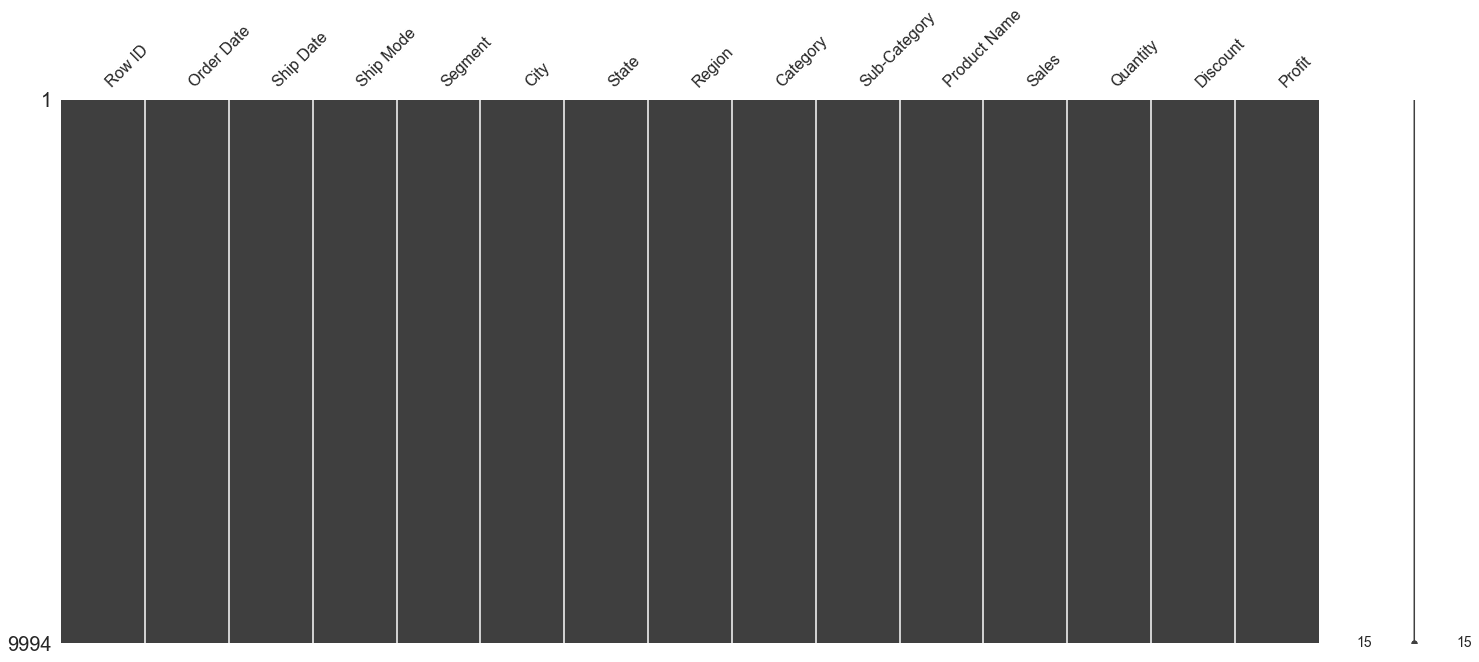

In [169]:
msno.matrix(df)

In [170]:
print(df.isnull().sum())

Row ID          0
Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [171]:
print(df.isna().sum())

Row ID          0
Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [172]:
df.shape

(9994, 15)

In [173]:
df.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Renombrado de columnas

In [174]:
# Renombrar columnas para facilitar el tratamiento
df.rename({'Row ID' : 'row_id',
           'Order Date' : 'order_date',
           'Ship Date' : 'ship_date',
           'Ship Mode' : 'ship_mode',
           'Segment' : 'segment',
           'City' : 'city',
           'State' : 'state',
           'Postal Code' : 'postal_code',
           'Region' : 'region',
           'Product ID' : 'product_id',
           'Category' : 'category',
           'Sub-Category' : 'subcategory',
           'Product Name' : 'product_name',
           'Sales' : 'sales',
           'Quantity' : 'quantity',
           'Discount' : 'discount',
           'Profit' : 'profit'
           },  axis="columns", inplace=True)
df.columns

df.sample(10)

,row_id,order_date,ship_date,ship_mode,segment,city,state,region,category,subcategory,product_name,sales,quantity,discount,profit
1679,1680,9/7/2014,9/13/2014,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Technology,Phones,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,32.382,3,0.4,4.3176
3267,3268,5/22/2014,5/29/2014,Standard Class,Consumer,Decatur,Alabama,South,Technology,Phones,Nortel Networks T7316 E Nt8 B27,135.980,2,0.0,33.9950
1149,1150,4/4/2015,4/4/2015,Same Day,Consumer,Lansing,Michigan,Central,Technology,Phones,Shocksock Galaxy S4 Armband,10.950,1,0.0,0.4380
6864,6865,8/21/2016,8/28/2016,Standard Class,Corporate,Los Angeles,California,West,Office Supplies,Binders,Avery Durable Slant Ring Binders,12.672,2,0.2,4.7520
7442,7443,12/9/2014,12/11/2014,First Class,Corporate,Brownsville,Texas,Central,Office Supplies,Paper,Xerox 195,10.688,2,0.2,3.7408
1527,1528,7/22/2016,7/27/2016,Standard Class,Consumer,Allentown,Pennsylvania,East,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",11.648,2,0.2,3.3488
2863,2864,8/13/2017,8/13/2017,Same Day,Consumer,San Francisco,California,West,Office Supplies,Storage,Sterilite Officeware Hinged File Box,31.440,3,0.0,8.4888
6301,6302,6/6/2014,6/12/2014,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",13.984,2,0.2,4.7196
3440,3441,11/29/2015,11/30/2015,Same Day,Home Office,San Francisco,California,West,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",4.304,1,0.2,1.5602
2879,2880,1/15/2016,1/19/2016,Standard Class,Home Office,Westfield,New Jersey,East,Technology,Accessories,Logitech Gaming G510s - Keyboard,254.970,3,0.0,91.7892


In [175]:
df.ship_mode.value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: ship_mode, dtype: int64

In [176]:
# Se eliminan los duplicados si es que existen
df = df.drop_duplicates()
df.shape

(9994, 15)

In [177]:
# Se cambia de tipo de dato int a string para evitar incurrir en errores de análisis cuantitativos
df['row_id'] = df['row_id'].astype(str)

In [178]:
# Cuantos datos hay por cada columna?
#df.count()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        9994 non-null   object 
 1   order_date    9994 non-null   object 
 2   ship_date     9994 non-null   object 
 3   ship_mode     9994 non-null   object 
 4   segment       9994 non-null   object 
 5   city          9994 non-null   object 
 6   state         9994 non-null   object 
 7   region        9994 non-null   object 
 8   category      9994 non-null   object 
 9   subcategory   9994 non-null   object 
 10  product_name  9994 non-null   object 
 11  sales         9994 non-null   float64
 12  quantity      9994 non-null   int64  
 13  discount      9994 non-null   float64
 14  profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.2+ MB


In [179]:
df.describe()

,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Detección de outliers

<AxesSubplot: xlabel='sales'>

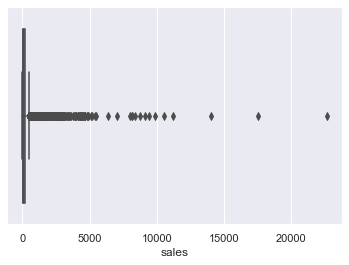

In [180]:
# boxplot Sales
sns.boxplot(x=df['sales'])

In [181]:
# # Se calculas los Cuantiles del df
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# # Que calculamos acá?
# IQR = Q3 - Q1
# print(IQR)

In [182]:
# # Que estamos calculando acá? Si ya calculamos los Q1 y Q3?
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df.shape

<AxesSubplot: xlabel='sales'>

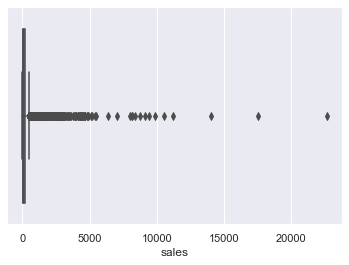

In [183]:
sns.boxplot(x=df['sales'])

<AxesSubplot: xlabel='quantity'>

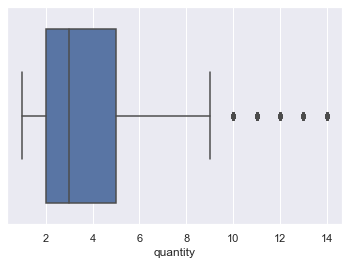

In [184]:
sns.boxplot(x=df['quantity'])

<AxesSubplot: xlabel='profit'>

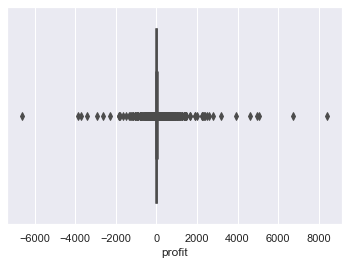

In [185]:
sns.boxplot(x=df.profit)

### Revisamos algunas distribuciones de variables

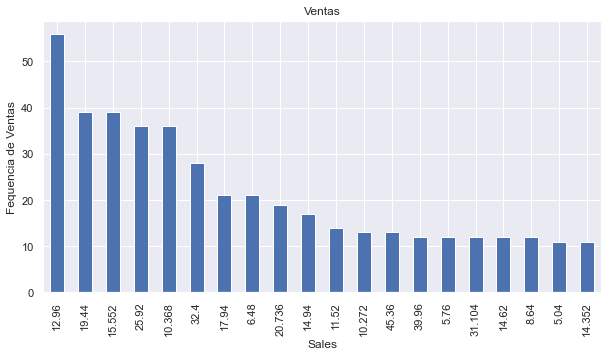

In [186]:
df.sales.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Ventas")
plt.ylabel('Fequencia de Ventas')
plt.xlabel('Sales');

,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


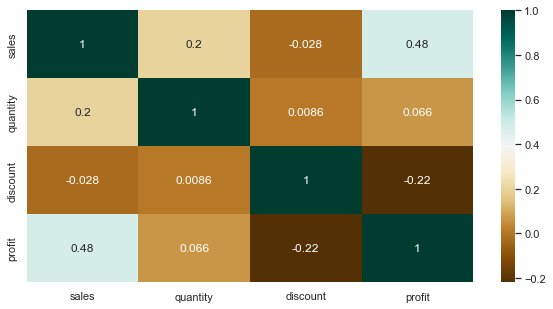

In [187]:
# Coeficiente de correlación
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Ingeniería de Atributos (Feature Engineering)
## Segmentación de las ventas

### Asignación de segmentos
1. Vamos a asignar una categoría según el valor de las ventas/profit
2. Vamos a crear una nueva columna llamada "Segmento"
3. A través de un ciclo for y el uso de ifelse vamos a asignar la categoría

In [188]:
# Calcula el promedio de sales y profit
prom_sales = df.sales.mean()
prom_profit = df.profit.mean()

# Crea una lista para almacenar los segmentos
segmento = []

# Itera a través de las filas del DataFrame
for index, row in df.iterrows():
    if row['sales'] < prom_sales and row['profit'] < prom_profit:
        segmento.append('bajo_bajo')
    elif row['sales'] < prom_sales and row['profit'] > prom_profit:
        segmento.append('bajo_alto')
    elif row['sales'] > prom_sales and row['profit'] < prom_profit:
        segmento.append('alto_bajo')
    elif row['sales'] > prom_sales and row['profit'] > prom_profit:
        segmento.append('alto_alto')
    else:
        segmento.append('otros')  # Manejo de casos que no cumplen ninguna condición

# Agrega la columna 'segmento' al DataFrame
df['segmento'] = segmento
df.sample(10)

,row_id,order_date,ship_date,ship_mode,segment,city,state,region,category,subcategory,product_name,sales,quantity,discount,profit,segmento
445,446,9/5/2016,9/7/2016,Second Class,Consumer,Detroit,Michigan,Central,Office Supplies,Labels,Avery 520,22.050,7,0.0,10.5840,bajo_bajo
14,15,11/22/2015,11/26/2015,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,bajo_bajo
7631,7632,3/30/2014,4/1/2014,First Class,Home Office,Brownsville,Texas,Central,Furniture,Chairs,"Global Stack Chair without Arms, Black",127.302,7,0.3,-9.0930,bajo_bajo
908,909,12/30/2017,1/3/2018,Standard Class,Consumer,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,bajo_bajo
9236,9237,9/2/2016,9/6/2016,Standard Class,Consumer,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,568.728,3,0.2,28.4364,alto_bajo
7196,7197,4/26/2014,4/30/2014,Standard Class,Home Office,Los Angeles,California,West,Office Supplies,Art,Newell 347,21.400,5,0.0,6.2060,bajo_bajo
8707,8708,9/8/2014,9/13/2014,Standard Class,Home Office,New York City,New York,East,Office Supplies,Art,Nontoxic Chalk,3.520,2,0.0,1.6896,bajo_bajo
2720,2721,11/4/2014,11/8/2014,Second Class,Corporate,Cary,North Carolina,South,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,8.376,3,0.2,2.7222,bajo_bajo
1766,1767,8/4/2016,8/8/2016,Standard Class,Home Office,Suffolk,Virginia,South,Office Supplies,Labels,Avery 478,9.820,2,0.0,4.8118,bajo_bajo
867,868,9/29/2016,10/2/2016,First Class,Corporate,Philadelphia,Pennsylvania,East,Office Supplies,Labels,Avery 483,15.936,4,0.2,5.1792,bajo_bajo


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


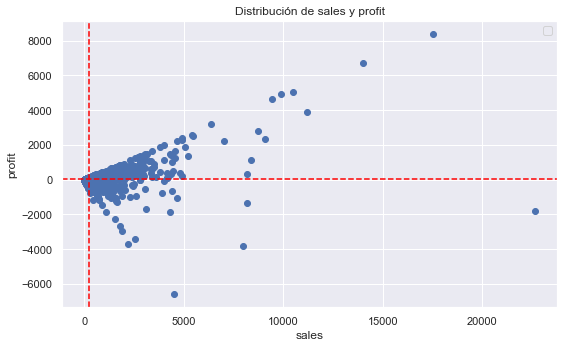

In [189]:
# Scatter plot para visualizar datos numéricos
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df['sales'], df['profit'])

plt.axvline(x=prom_sales, color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=prom_profit, color='red', linestyle='--', linewidth=1.5)

plt.title('Distribución de sales y profit')

ax.set_xlabel('sales')
ax.set_ylabel('profit')

plt.legend()
plt.tight_layout();
plt.show();

## Calculamos el profit en porcentaje

In [190]:
df['porcentaje_profit'] = df['profit']/df['sales']
df.porcentaje_profit.sample(10)

9321   -0.500000
6963    0.250000
3164    0.450000
1497    0.287500
1257   -0.733333
8120    0.000000
4459    0.100000
759     0.450000
646     0.312500
5287   -1.700000
Name: porcentaje_profit, dtype: float64

In [191]:
df.head(5)

,row_id,order_date,ship_date,ship_mode,segment,city,state,region,category,subcategory,product_name,sales,quantity,discount,profit,segmento,porcentaje_profit
0,1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,alto_alto,0.1600
1,2,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,alto_alto,0.3000
2,3,6/12/2016,6/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,bajo_bajo,0.4700
3,4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,alto_bajo,-0.4000
4,5,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,bajo_bajo,0.1125


### Uso de tablas de contingencia

## Uso de tablas de contingencia con Pandas

In [192]:
# Ejemplos
# Agrupar por variables más grandes para tener una visión más amplia
table_region = pd.crosstab(index=df.region, columns=df.ship_mode)
table_region

ship_mode,First Class,Same Day,Second Class,Standard Class
region,,,,
Central,299,120,465,1439
East,490,155,530,1673
South,234,83,329,974
West,515,185,621,1882


In [193]:
# Agrupar por variables más grandes para tener una visión más amplia
table_region = pd.crosstab(index=df.region, columns=df.segmento, margins=True, margins_name="Total")
table_region

segmento,alto_alto,alto_bajo,bajo_alto,bajo_bajo,Total
region,,,,,
Central,318,211,181,1613,2323
East,421,255,294,1878,2848
South,279,108,175,1058,1620
West,517,251,366,2069,3203
Total,1535,825,1016,6618,9994


## Análisis Univariado
* Analizar los tipos de distribución de las variables numéricas.
* Use estadística descriptiva
* Probar distribución normal. Investigar los test y scripts para desarrollar esto.
* Recomiendo revisar la librería Scipy y los gráficos de distribución de Seaborn y Matplotlib
  * Link: https://scipy.org/
* Investigar sobre los test de normalidad y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
* Investigar sobre pruebas para variables categoricas y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
* Investigar sobre pruebas para variables numéricas (t-test) y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Análisis de Componentes Principales (PCA)

In [194]:
# import numpy as np
# import matplotlib.pyplot as plt

# class PCA:
#     def __init__(self, n_components):
#         self.n_components = n_components
#         self.components = None
#         self.mean = None
    
#     def fit(self, X):
#         # Center data
#         self.mean = np.mean(X, axis=0)
#         X = X - self.mean

#         # Cálculo de la matriz de covarianza
#         cov = np.cov(X, rowvar=False)

#         # Cálculo de los autovalores y autovectores
#         eigenvalues, eigenvectors = np.linalg.eigh(cov)
#         # Ordenar los autovectores de mayor a menor
#         idx = np.argsort(eigenvalues)[::-1]
#         eigenvalues = eigenvalues[idx]
#         eigenvectors = eigenvectors[:,idx]

#         # Seleccionar los n_components eigenvectors como componentes principales
#         self.components = eigenvectors[:,:self.n_components]

#         # Calcular y almacenar los autovalores en la instancia
#         self.explained_variance_ = eigenvalues[:self.n_components]

#     def transform(self, X):
#         # Proyectar los datos en el nuevo espacio
#         X = X - self.mean
#         X_transformed = np.dot(X, self.components)
#         return X_transformed
    

In [195]:
# # Creación de la instancia PCA
# pca = PCA(n_components=2)
# pca.fit(df[['sales', 'profit']].values)
# X_pca = pca.transform(df[['sales', 'profit']].values)
# print(X_pca.shape)

In [196]:
# # Visualización de los datos transformados
# plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['profit'], alpha=0.5)
# for length, vector in zip(pca.explained_variance_, pca.components.T):
#     v = vector * 2 * np.sqrt(length)
#     plot = plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)

# plt.show()

In [197]:
# Crear un DataFrame con las componentes principales
# pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Agregar otras columnas necesarias del DataFrame original si es necesario
# pca_df['sales'] = df['sales']
# pca_df['profit'] = df['profit']
# pca_df['segmento'] = df['segmento']

# Ahora, 'pca_df' es un nuevo DataFrame que contiene las componentes principales junto con otras columnas relevantes.

# Finanzas (2ptos)
### Que ciudades son las que tiene mejor Profit
1. Rentabilidad entre categorías. Evidencia estadística
2. Rentabilidad entre segmentos. Hay diferencia estadística

In [198]:
# 1. Rentabilidad entre categorías
# Buscamos a través de un pivot_table la rentabilidad por categoría
tabla_profit_categoria = pd.pivot_table(df, values=['porcentaje_profit'], index=['category'], aggfunc=['mean','median','std'], margins=True, margins_name="Total").round(2)
tabla_profit_categoria

,mean,median,std
,porcentaje_profit,porcentaje_profit,porcentaje_profit
category,,,
Furniture,0.04,0.11,0.34
Office Supplies,0.14,0.32,0.55
Technology,0.16,0.18,0.23
Total,0.12,0.27,0.47


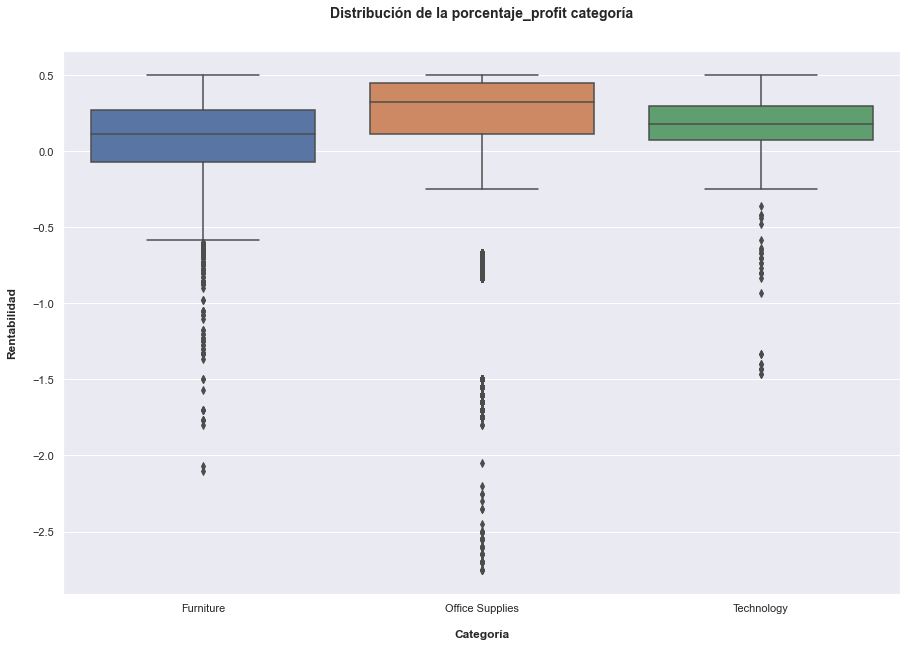

In [199]:
# Como ya generamos una columna con el porcentaje de profit, podemos usarla para crear un subset de datos que nos permita visualizar la rentabilidad por categoría
tmp_rent_categoria = df[['category','profit','porcentaje_profit']]
# Visualizamos la distribución de la rentabilidad por categoría
plt.figure(figsize=(15,10))
sns.boxplot(x=tmp_rent_categoria['category'], y=tmp_rent_categoria['porcentaje_profit'], data=tmp_rent_categoria)
plt.title('Distribución de la porcentaje_profit categoría', fontsize=14, fontweight='bold', y=1.05)
plt.xlabel('Categoría', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

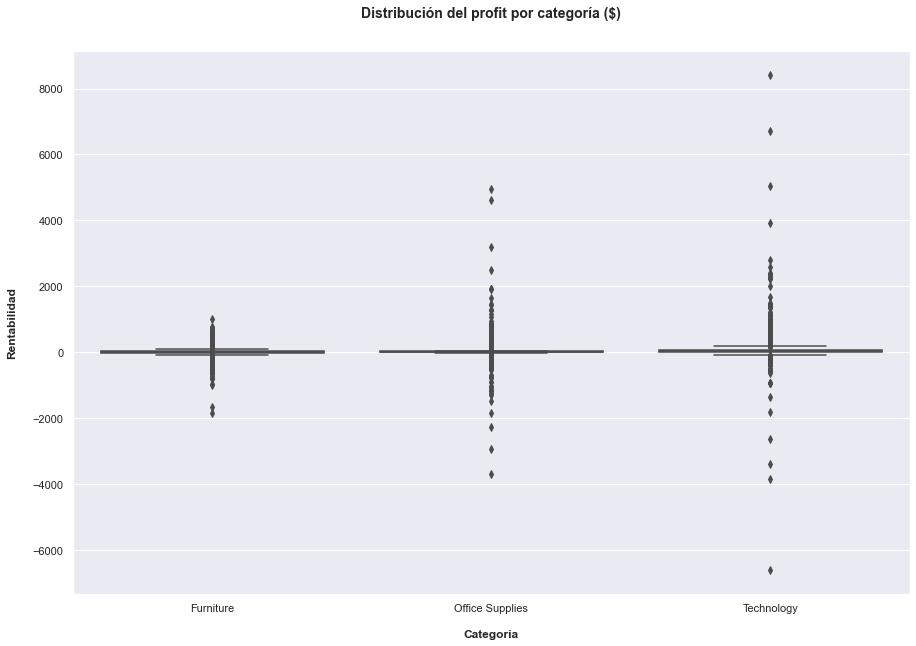

In [200]:
# Como ya generamos una columna con el porcentaje de profit, podemos usarla para crear un subset de datos que nos permita visualizar la rentabilidad
# por categoría
# tmp_rent_categoria = df[['category','profit']]
# Visualizamos la distribución de la rentabilidad por categoría
plt.figure(figsize=(15,10))
sns.boxplot(x=tmp_rent_categoria['category'], y=tmp_rent_categoria['profit'], data=tmp_rent_categoria)
plt.title('Distribución del profit por categoría ($)', fontsize=14, fontweight='bold', y=1.05)
plt.xlabel('Categoría', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

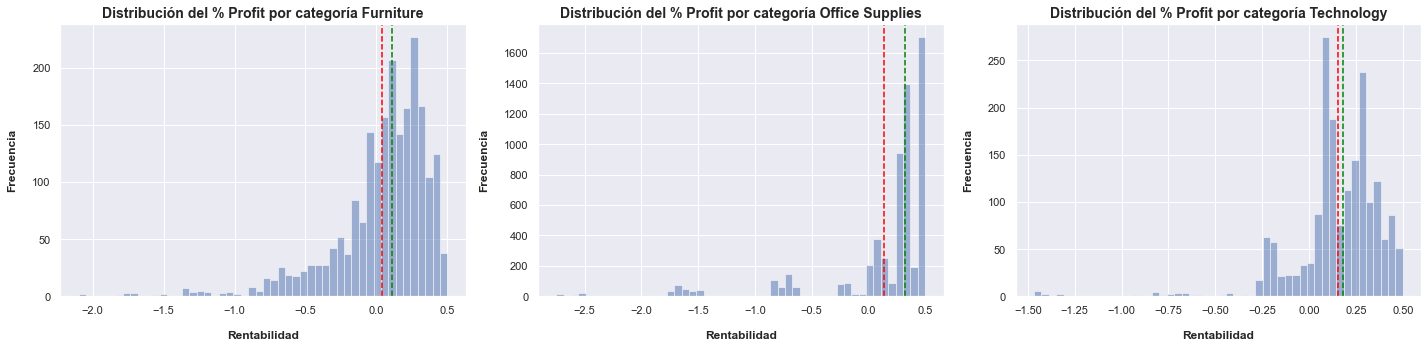

In [201]:
# La otra opción es visualizar las distribuciones de las rentabilidades por categoría en gráficos distintos, a través de un histograma de 
# matplotlib a través de un subplot de matplotlib (acá un ejemplo de cómo hacerlo: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1) # 1 fila, 3 columnas, posición 1
plt.hist(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['porcentaje_profit'], bins=50, alpha=0.5, label='Furniture')
plt.title('Distribución del % Profit por categoría Furniture', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')
# Incluir la media y la mediana en el gráfico a través de líneas verticales
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['porcentaje_profit'].mean(), color='red', linestyle='--', linewidth=1.5)
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['porcentaje_profit'].median(), color='green', linestyle='--', linewidth=1.5)

plt.subplot(1,3,2) # 1 fila, 3 columnas, posición 2
plt.hist(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['porcentaje_profit'], bins=50, alpha=0.5, label='Office Supplies')
plt.title('Distribución del % Profit por categoría Office Supplies', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')
# Incluir la media y la mediana en el gráfico a través de líneas verticales
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['porcentaje_profit'].mean(), color='red', linestyle='--', linewidth=1.5)
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['porcentaje_profit'].median(), color='green', linestyle='--', linewidth=1.5)


plt.subplot(1,3,3) # 1 fila, 3 columnas, posición 3
plt.hist(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['porcentaje_profit'], bins=50, alpha=0.5, label='Technology')
plt.title('Distribución del % Profit por categoría Technology', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')
# Incluir la media y la mediana en el gráfico a través de líneas verticales
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['porcentaje_profit'].mean(), color='red', linestyle='--', linewidth=1.5)
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['porcentaje_profit'].median(), color='green', linestyle='--', linewidth=1.5)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show();


### La otra opción es visualizar las distribuciones de las rentabilidades por categoría en gráficos a través de subplots verticales

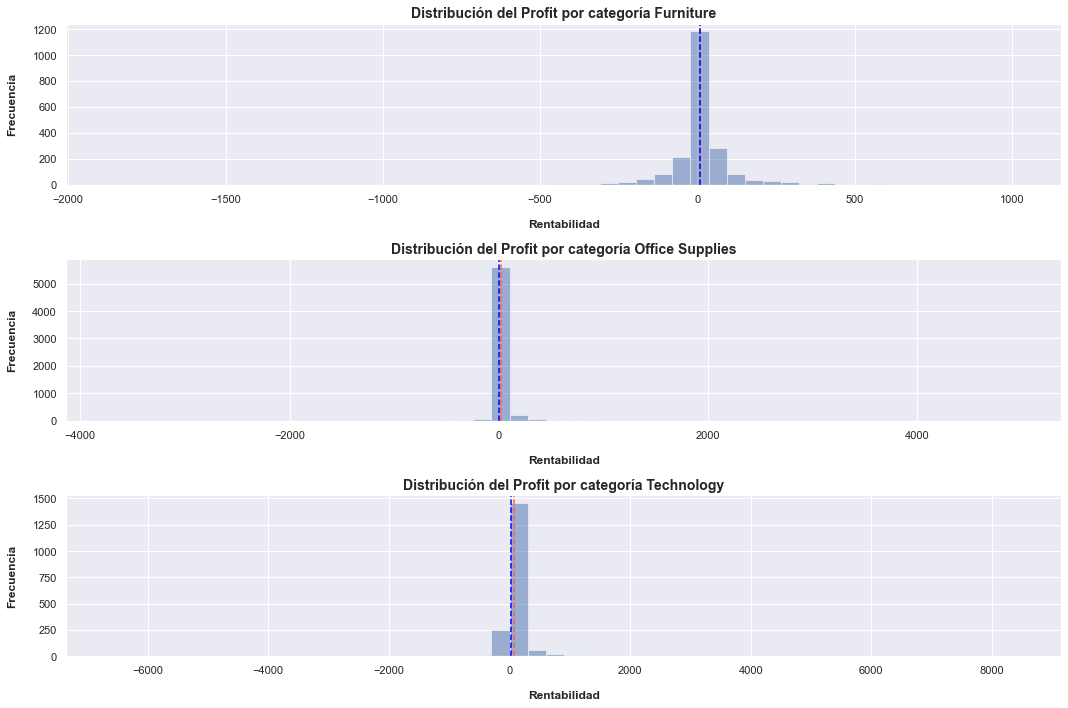

In [202]:
# La otra opción es visualizar las distribuciones de las rentabilidades por categoría
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.hist(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['profit'], bins=50, alpha=0.5, label='Furniture')
plt.title('Distribución del Profit por categoría Furniture', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')
# Incluir la media y la mediana en el gráfico a través de líneas verticales
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['profit'].mean(), color='tomato', linestyle='--', linewidth=1.5)
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['profit'].median(), color='blue', linestyle='--', linewidth=1.5)

plt.subplot(3,1,2)
plt.hist(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['profit'], bins=50, alpha=0.5, label='Office Supplies')
plt.title('Distribución del Profit por categoría Office Supplies', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')
# Incluir la media y la mediana en el gráfico a través de líneas verticales
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['profit'].mean(), color='tomato', linestyle='--', linewidth=1.5)
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['profit'].median(), color='blue', linestyle='--', linewidth=1.5)


plt.subplot(3,1,3)
plt.hist(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['profit'], bins=50, alpha=0.5, label='Technology')
plt.title('Distribución del Profit por categoría Technology', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')
# Incluir la media y la mediana en el gráfico a través de líneas verticales
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['profit'].mean(), color='tomato', linestyle='--', linewidth=1.5)
plt.axvline(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['profit'].median(), color='blue', linestyle='--', linewidth=1.5)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show();

## Probaremos si la distribución de las rentabilidades es normal o no
* H0: No hay diferencia estadística entre las categorías de productos
* H1: Existe diferencia estadística entre las categorías de productos

In [203]:
# Debemos testear si hay normalidad en la distribución de las rentabilidades por categoría, para ello usamos el test de Shapiro-Wilk
# H0: La distribución es normal
# H1: La distribución no es normal

# Test de Shapiro-Wilk
# Furniture
stat, p = stats.shapiro(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['porcentaje_profit'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
    print('La distribución de la rentabilidad de la categoría Furniture parece normal (no se rechaza H0)')
else:
    print('La distribución de la rentabilidad de la categoría Furniture NO parece normal (se rechaza H0)')

# Office Supplies
stat, p = stats.shapiro(tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['porcentaje_profit'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
    print('La distribución de la rentabilidad de la categoría Office Supplies parece normal (no se rechaza H0)')
else:
    print('La distribución de la rentabilidad de la categoría Office Supplies NO parece normal (se rechaza H0)')

# Technology
stat, p = stats.shapiro(tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['porcentaje_profit'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretación
alpha = 0.05
if p > alpha:
    print('La distribución de la rentabilidad de la categoría Technology parece normal (no se rechaza H0)')
else:
    print('La distribución de la rentabilidad de la categoría Technology NO parece normal (se rechaza H0)')


Statistics=0.851, p=0.000
La distribución de la rentabilidad de la categoría Furniture NO parece normal (se rechaza H0)
Statistics=0.612, p=0.000
La distribución de la rentabilidad de la categoría Office Supplies NO parece normal (se rechaza H0)
Statistics=0.831, p=0.000
La distribución de la rentabilidad de la categoría Technology NO parece normal (se rechaza H0)


# Transformación de la data:
* Sólo ejemplo y para practicar el código pondremos en práctica algunas transformaciones
* Recuerden que deben hacerlo para todas las variables numéricas

In [204]:
# Creamos una nueva columna con la transformación logarítmica de la rentabilidad en nuestro subset de datos
tmp_rent_categoria['log_rentabilidad'] = np.log(tmp_rent_categoria['porcentaje_profit'])
tmp_rent_categoria.head(5)

,category,profit,porcentaje_profit,log_rentabilidad
0,Furniture,41.9136,0.1600,-1.832581
1,Furniture,219.5820,0.3000,-1.203973
2,Office Supplies,6.8714,0.4700,-0.755023
3,Furniture,-383.0310,-0.4000,NaN
4,Office Supplies,2.5164,0.1125,-2.184802


# y que hacemos con los valores NAN?

## Normalización de la data: MinMaxScaler
* La normalización es un proceso para escalar los valores numéricos en un rango específico, como [0, 1], mientras mantiene la distribución de los datos.
* Uno de los métodos más comunes para normalizar datos es el método Min-Max, que utiliza la fórmula siguiente:
$X = (X - X.min / (X.max - X.min)$
* Link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [205]:
# Vamos a implementar una transformación MinMaxScaler para normalizar los datos de la rentabilidad.
# Primero lo haremos paso a paso, para luego implementar una función que nos permita hacerlo de manera automática
# Calculamos el mínimo y el máximo de la rentabilidad
profit_min = tmp_rent_categoria['profit'].min()
profit_max = tmp_rent_categoria['profit'].max()
print('Mínimo: ', profit_min)
print('Máximo: ', profit_max)

# Calculamos el rango de la rentabilidad
profit_rango = profit_max - profit_min
print('Rango: ', profit_rango.round(2))

Mínimo:  -6599.978
Máximo:  8399.976
Rango:  14999.95


In [206]:
# Calculamos la rentabilidad normalizada
tmp_rent_categoria['profit_minmax_handcraft'] = (tmp_rent_categoria['profit'] - profit_min) / profit_rango
tmp_rent_categoria.head(5) #.min() .max()


,category,profit,porcentaje_profit,log_rentabilidad,profit_minmax_handcraft
0,Furniture,41.9136,0.1600,-1.832581,0.442794
1,Furniture,219.5820,0.3000,-1.203973,0.454639
2,Office Supplies,6.8714,0.4700,-0.755023,0.440458
3,Furniture,-383.0310,-0.4000,NaN,0.414464
4,Office Supplies,2.5164,0.1125,-2.184802,0.440168


In [207]:
# Implementamos la función MinMaxScaler de Sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Calculamos la rentabilidad normalizada
tmp_rent_categoria['profit_minmax_skl'] = scaler.fit_transform(tmp_rent_categoria[['profit']])
tmp_rent_categoria.head(5)

,category,profit,porcentaje_profit,log_rentabilidad,profit_minmax_handcraft,profit_minmax_skl
0,Furniture,41.9136,0.1600,-1.832581,0.442794,0.442794
1,Furniture,219.5820,0.3000,-1.203973,0.454639,0.454639
2,Office Supplies,6.8714,0.4700,-0.755023,0.440458,0.440458
3,Furniture,-383.0310,-0.4000,NaN,0.414464,0.414464
4,Office Supplies,2.5164,0.1125,-2.184802,0.440168,0.440168


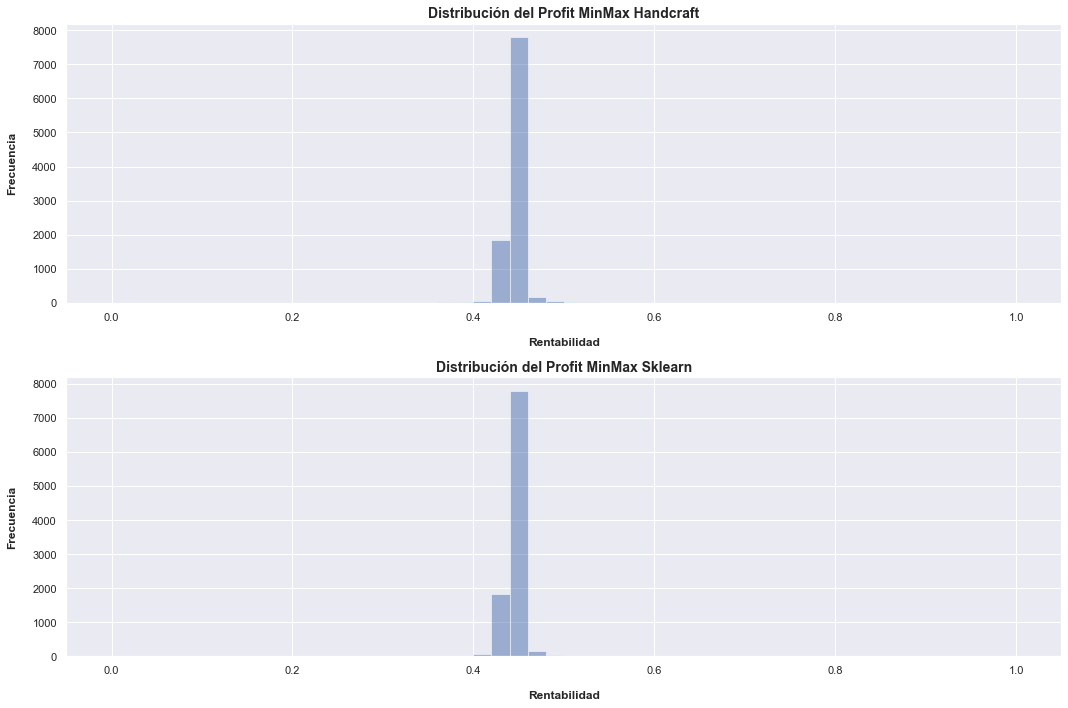

In [208]:
# Visualizamos la distribución de la rentabilidad normalizada
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(tmp_rent_categoria['profit_minmax_handcraft'], bins=50, alpha=0.5, label='Profit MinMax Handcraft')
plt.title('Distribución del Profit MinMax Handcraft', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')

plt.subplot(2,1,2)
plt.hist(tmp_rent_categoria['profit_minmax_skl'], bins=50, alpha=0.5, label='Profit MinMax Sklearn')
plt.title('Distribución del Profit MinMax Sklearn', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidad', fontsize=12, labelpad=15, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12, labelpad=15, fontweight='bold')

plt.tight_layout()
plt.show();

## Estandarización de la data: StandardScaler de Scikit-Learn

In [209]:
# Implementaremos la funció StandardScaler para normalizar los datos de la rentabilidad.
# Primero lo haremos paso a paso, para luego implementar una función que nos permita hacerlo de manera automática
# Calculamos la media y la desviación estándar de la rentabilidad
profit_mean = tmp_rent_categoria['profit'].mean()
profit_std = tmp_rent_categoria['profit'].std()
print('Media: ', profit_mean)
print('Desviación estándar: ', profit_std)



Media:  28.65689630778467
Desviación estándar:  234.2601076909573


In [210]:
# Calculamos la rentabilidad normalizada
tmp_rent_categoria['profit_standard_normalizada'] = (tmp_rent_categoria['profit'] - profit_mean) / profit_std
tmp_rent_categoria.head(5) #.min() .max()

,category,profit,porcentaje_profit,log_rentabilidad,profit_minmax_handcraft,profit_minmax_skl,profit_standard_normalizada
0,Furniture,41.9136,0.1600,-1.832581,0.442794,0.442794,0.056590
1,Furniture,219.5820,0.3000,-1.203973,0.454639,0.454639,0.815013
2,Office Supplies,6.8714,0.4700,-0.755023,0.440458,0.440458,-0.092997
3,Furniture,-383.0310,-0.4000,NaN,0.414464,0.414464,-1.757397
4,Office Supplies,2.5164,0.1125,-2.184802,0.440168,0.440168,-0.111587


In [211]:
# Ahora haremos los mismo, pero a través de la función StandardScaler de sklearn
# Importamos la función
from sklearn.preprocessing import StandardScaler

# Creamos una instancia de la función
scaler = StandardScaler()


In [212]:
# Ajustamos la instancia a nuestro subset de datos
scaler.fit(tmp_rent_categoria[['profit']])
print(scaler.mean_)
print(scaler.scale_)

[28.65689631]
[234.24838736]


In [213]:
tmp_rent_categoria['profit_standard_normalizada_skl'] = scaler.transform(tmp_rent_categoria[['profit']])
tmp_rent_categoria.head(5)

,category,profit,porcentaje_profit,log_rentabilidad,profit_minmax_handcraft,profit_minmax_skl,profit_standard_normalizada,profit_standard_normalizada_skl
0,Furniture,41.9136,0.1600,-1.832581,0.442794,0.442794,0.056590,0.056593
1,Furniture,219.5820,0.3000,-1.203973,0.454639,0.454639,0.815013,0.815054
2,Office Supplies,6.8714,0.4700,-0.755023,0.440458,0.440458,-0.092997,-0.093002
3,Furniture,-383.0310,-0.4000,NaN,0.414464,0.414464,-1.757397,-1.757484
4,Office Supplies,2.5164,0.1125,-2.184802,0.440168,0.440168,-0.111587,-0.111593


# Tarea:
* Visualizar las distribuciones de las rentabilidades calculadas en el punto anterior
* Probar si las distribuciones son normales o no

In [216]:
# # Como los datos no son normales, usamos el test de Levene para testear la igualdad de varianzas
# # H0: Las varianzas son iguales
# # H1: Las varianzas no son iguales

# # Test de Levene
# stat, p = stats.levene(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['log_rentabilidad'], 
#                        tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['log_rentabilidad'],
#                        tmp_rent_categoria[tmp_rent_categoria['category']=='Technology']['log_rentabilidad'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpretación
# alpha = 0.05
# if p > alpha:
#     print('Las varianzas parecen iguales (no se rechaza H0)')
# else:
#     print('Las varianzas NO parecen iguales (se rechaza H0)')

# # Como las varianzas no son iguales, usamos el test de Welch para testear la igualdad de medias
# # H0: Las medias son iguales
# # H1: Las medias no son iguales

# # Test de Welch
# stat, p = stats.ttest_ind(tmp_rent_categoria[tmp_rent_categoria['category']=='Furniture']['log_rentabilidad'], 
#                        tmp_rent_categoria[tmp_rent_categoria['category']=='Office Supplies']['log_rentabilidad'],
#                        equal_var=False)
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpretación
# alpha = 0.05
# if p > alpha:
#     print('Las medias parecen iguales (no se rechaza H0)')
# else:
#     print('Las medias NO parecen iguales (se rechaza H0)')


Statistics=nan, p=nan
Las varianzas NO parecen iguales (se rechaza H0)
Statistics=nan, p=nan
Las medias NO parecen iguales (se rechaza H0)


# Operaciones (2ptos)
### Cuales son los state que tiene mayor nivel de ventas
1. A que estados estamos enviando más? Evidencia estadística
2. Diferencia entre segmentos. Hay diferencia estadística


# Comercial (2ptos)
## Cuales son las categorías de productos más rentables
1. Hay diferencias entre categorías? (estadística)
2. En que estados se presentan estas diferencias
3. En que categorías se detectaron los mayores descuentos

# Conclusiones (3ptos)
***ATENCIÓN***
* Las conclusiones deben incluír las métricas investigadas en los análisis que se realizaron
* Se probará su script para que el código sea reproducible

1. Que conclusiones podemos sacar de este análisis?
2. Que recomendaciones podemos dar a la empresa?
3. Que análisis adicionales podemos hacer?